In [1]:
# s&p 500 10y historical data
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('sp500_10yhist.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2014-12-01 00:00:00-05:00,2065.780029,2065.780029,2049.570068,2053.439941,4159010000,0.0,0.0
1,2014-12-02 00:00:00-05:00,2053.770020,2068.770020,2053.770020,2066.550049,3686650000,0.0,0.0
2,2014-12-03 00:00:00-05:00,2067.449951,2076.280029,2066.649902,2074.330078,3612680000,0.0,0.0
3,2014-12-04 00:00:00-05:00,2073.639893,2077.340088,2062.340088,2071.919922,3408340000,0.0,0.0
4,2014-12-05 00:00:00-05:00,2072.780029,2079.469971,2070.810059,2075.370117,3419620000,0.0,0.0


In [4]:
# split date and time(?) of date column
df[['Date', 'drop']] = df['Date'].str.split(pat=' ', expand=True)
# keep only date portion
df.drop(labels='drop', axis=1,inplace=True)
# convert to datetime, set as index
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df = df.set_index('Date', drop=False)
# infer date frequency
df = df.asfreq(pd.infer_freq(df.index))

In [5]:
df.isna().sum()

Date            1135
Open            1135
High            1135
Low             1135
Close           1135
Volume          1135
Dividends       1135
Stock Splits    1135
dtype: int64

In [6]:
df.head(10)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2014-12-01,2014-12-01,2065.780029,2065.780029,2049.570068,2053.439941,4.159010e+09,0.0,0.0
2014-12-02,2014-12-02,2053.770020,2068.770020,2053.770020,2066.550049,3.686650e+09,0.0,0.0
2014-12-03,2014-12-03,2067.449951,2076.280029,2066.649902,2074.330078,3.612680e+09,0.0,0.0
2014-12-04,2014-12-04,2073.639893,2077.340088,2062.340088,2071.919922,3.408340e+09,0.0,0.0
2014-12-05,2014-12-05,2072.780029,2079.469971,2070.810059,2075.370117,3.419620e+09,0.0,0.0
2014-12-06,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-07,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-08,2014-12-08,2074.840088,2075.780029,2054.270020,2060.310059,3.800990e+09,0.0,0.0
2014-12-09,2014-12-09,2056.550049,2060.600098,2034.170044,2059.820068,3.970150e+09,0.0,0.0


In [7]:
# nans are weekends/holidays, drop
df.dropna(inplace=True)
df.isna().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [8]:
# add some data columns
# calculate daily percent change 
df['% change'] = 100 * ((df['Close'] - df['Open']) / df['Open'])
# calculate moving averages
df['Close5d_MA'] = df['Close'].rolling(window=5, min_periods=5).mean()
df['Close30d_MA'] = df['Close'].rolling(window=30, min_periods=30).mean()

In [9]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,% change,Close5d_MA,Close30d_MA
Date,,,,,,,,,,,
2014-12-01,2014-12-01,2065.780029,2065.780029,2049.570068,2053.439941,4.159010e+09,0.0,0.0,-0.597357,NaN,NaN
2014-12-02,2014-12-02,2053.770020,2068.770020,2053.770020,2066.550049,3.686650e+09,0.0,0.0,0.622272,NaN,NaN
2014-12-03,2014-12-03,2067.449951,2076.280029,2066.649902,2074.330078,3.612680e+09,0.0,0.0,0.332783,NaN,NaN
2014-12-04,2014-12-04,2073.639893,2077.340088,2062.340088,2071.919922,3.408340e+09,0.0,0.0,-0.082945,NaN,NaN
2014-12-05,2014-12-05,2072.780029,2079.469971,2070.810059,2075.370117,3.419620e+09,0.0,0.0,0.124957,2068.322021,NaN


In [10]:
df.describe()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,% change,Close5d_MA,Close30d_MA
count,2517,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03,2517.0,2517.0,2517.000000,2513.000000,2488.000000
mean,2019-11-30 13:57:34.112038400,3322.074491,3339.766616,3303.069773,3322.596436,4.003327e+09,0.0,0.0,0.017484,3321.455296,3314.804460
min,2014-12-01 00:00:00,1833.400024,1847.000000,1810.099976,1829.079956,1.296530e+09,0.0,0.0,-5.709928,1850.273975,1896.451656
25%,2017-06-01 00:00:00,2404.550049,2416.679932,2393.879883,2404.389893,3.423480e+09,0.0,0.0,-0.332069,2411.997998,2427.243329
50%,2019-11-29 00:00:00,2984.250000,2999.149902,2970.090088,2984.870117,3.817470e+09,0.0,0.0,0.043453,2987.793945,2970.881156
75%,2022-05-31 00:00:00,4183.029785,4202.700195,4161.720215,4183.959961,4.338490e+09,0.0,0.0,0.454048,4181.966016,4169.331372
max,2024-11-29 00:00:00,6014.109863,6044.169922,6003.979980,6032.379883,9.976520e+09,0.0,0.0,5.487571,6001.891992,5891.970996
std,NaN,1062.280036,1067.774603,1056.776766,1062.639553,9.537574e+08,0.0,0.0,0.879069,1059.683049,1042.651384


Text(0, 0.5, 'Closing Price ($)')

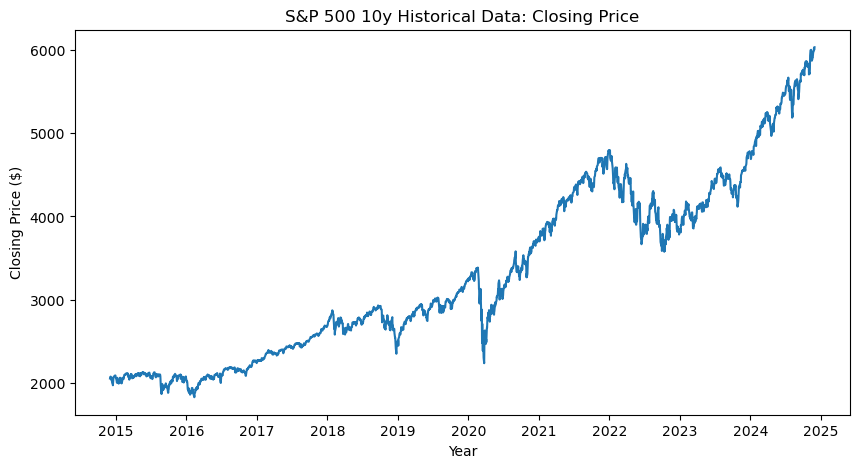

In [11]:
plt.figure(figsize=(10,5))
plt.plot(df['Close'])
plt.title('S&P 500 10y Historical Data: Closing Price')
plt.xlabel('Year')
plt.ylabel('Closing Price ($)')

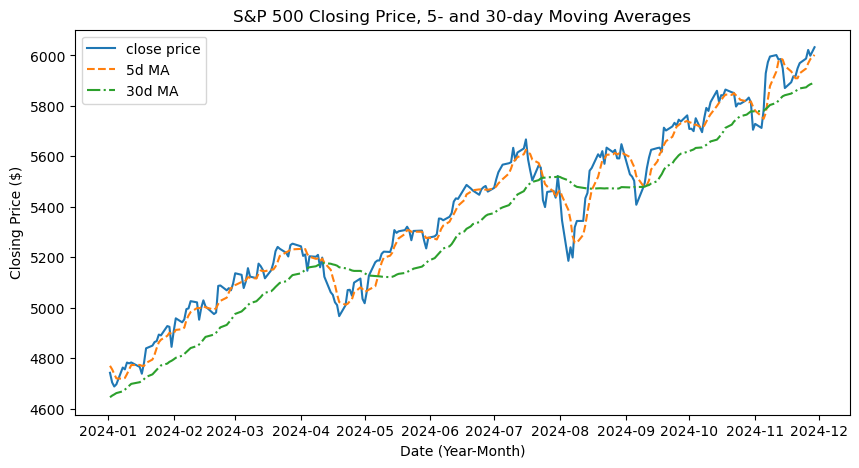

In [12]:
plt.figure(figsize=(10,5))
plt.plot(df.loc['2024', 'Close'], label='close price')
plt.plot(df.loc['2024', 'Close5d_MA'], '--', label='5d MA')
plt.plot(df.loc['2024', 'Close30d_MA'], '-.', label='30d MA')
plt.title('S&P 500 Closing Price, 5- and 30-day Moving Averages')
plt.xlabel('Date (Year-Month)')
plt.ylabel('Closing Price ($)')
plt.legend()

Text(0.5, 1.0, 'S&P 500 10y Historical Data:\nDaily Percent Change')

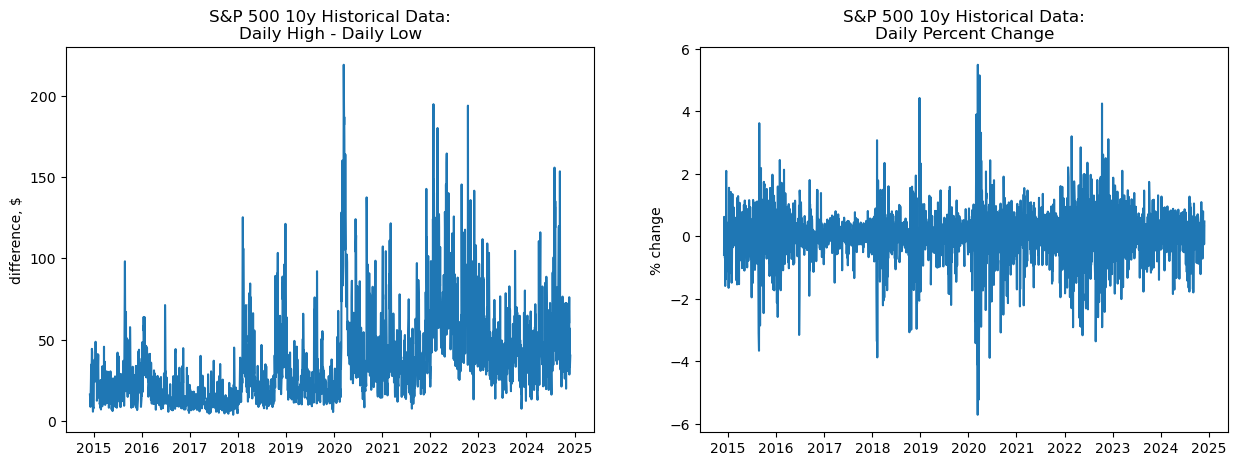

In [13]:
# volatility by daily high and low, percent change
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(df['High'] - df['Low'], label='high - low')
ax[0].set_ylabel('difference, $')
ax[0].set_title('S&P 500 10y Historical Data:\nDaily High - Daily Low')

ax[1].plot(df['% change'])
ax[1].set_ylabel('% change')
ax[1].set_title('S&P 500 10y Historical Data:\nDaily Percent Change')

- periods of high volatility and low volatility
- volatility easier to see in percent change plot
- largest fluctuations in early 2020 when news of the pandemic set in

In [14]:
# heatmap to show volatility in a different visualization with month and day granularity
# break out year, month, day for heatmap
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day

# pivot data for heatmap
pivoted = df.pivot(index=['Year', 'Month'], columns=['Day'], values='% change')
pivotedclose = df.pivot(index=['Year', 'Month'], columns=['Day'], values='Close')
pivotedopen = df.pivot(index=['Year', 'Month'], columns=['Day'], values='Open')

# sort index and columns for heatmap
pivoted.sort_index(level=0, axis=0, ascending=False, sort_remaining=True, inplace=True)
pivoted.sort_index(level=0, axis=1, ascending=True, sort_remaining=True, inplace=True)
pivoted.fillna(0, inplace=True)

Text(0.5, 80.7222222222222, 'Day of Month')

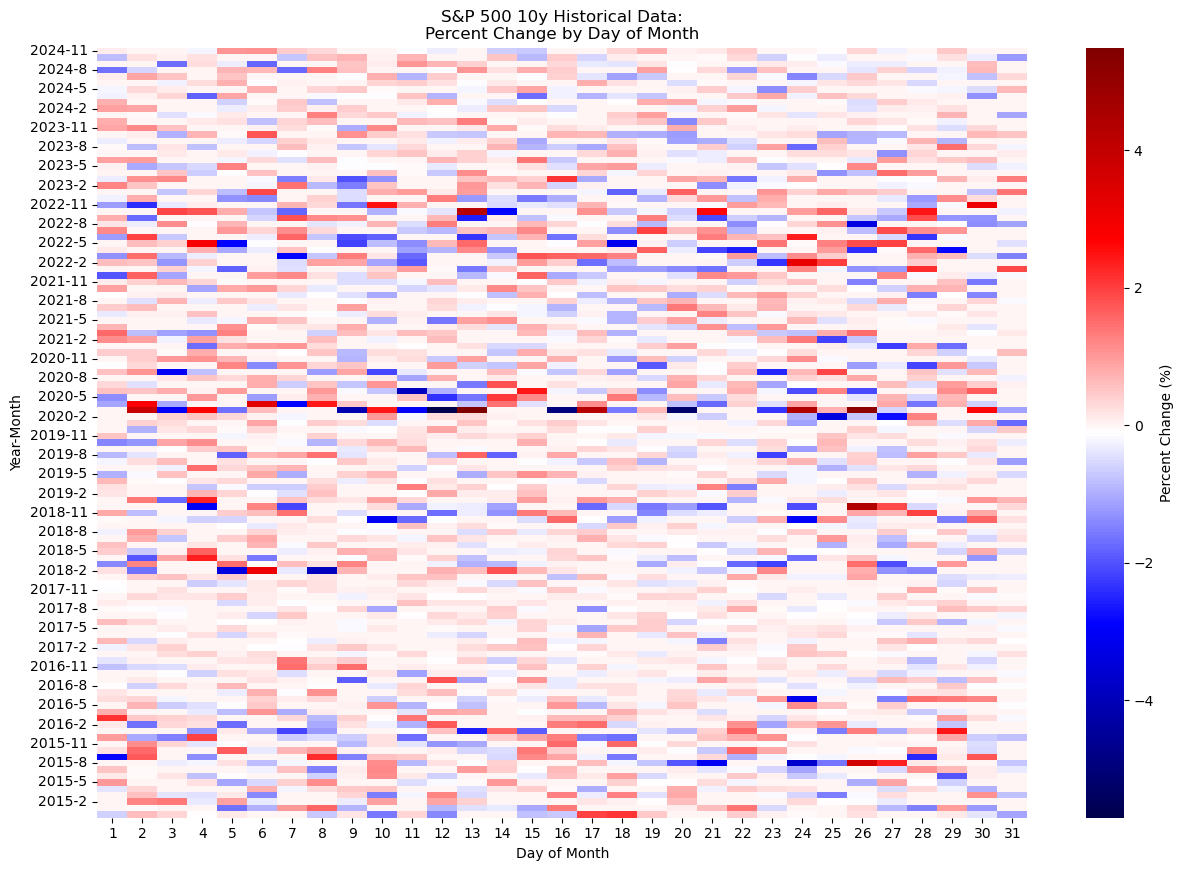

In [15]:
# plot heatmap
plt.figure(figsize=(15,10))
sns.heatmap(pivoted, cbar_kws={'label':'Percent Change (%)'}, cmap='seismic')
plt.title('S&P 500 10y Historical Data:\nPercent Change by Day of Month')
plt.xlabel('Day of Month')

- months/days of higher volatility shown by areas of more intense color
- periods of lower volatility are more muted in color

In [16]:
# day of minimums of each month
minlow = df.groupby(['Year', 'Month'])['Low'].min()

mindays = []
for y, m in minlow.index:
    cond = (df['Year'] == y) & (df['Month'] == m)
    subdf = df.loc[cond, :]
    mindays.append(subdf.loc[subdf['Low'] == minlow[y,m], 'Day'])
    
dayofmin = pd.concat(mindays)

# month of minimums of each year
minlow = df.groupby(['Year'])['Low'].min()

mindays = []
for y in minlow.index:
    cond = (df['Year'] == y)
    subdf = df.loc[cond, :]
    mindays.append(subdf.loc[subdf['Low'] == minlow[y], 'Month'])
    
monthofmin = pd.concat(mindays)

Text(0.5, 1.0, 'Lows of year occur in particular month?\nS&P 500 10y Historical Data:\nNumber of times the yearly low occured in particular month')

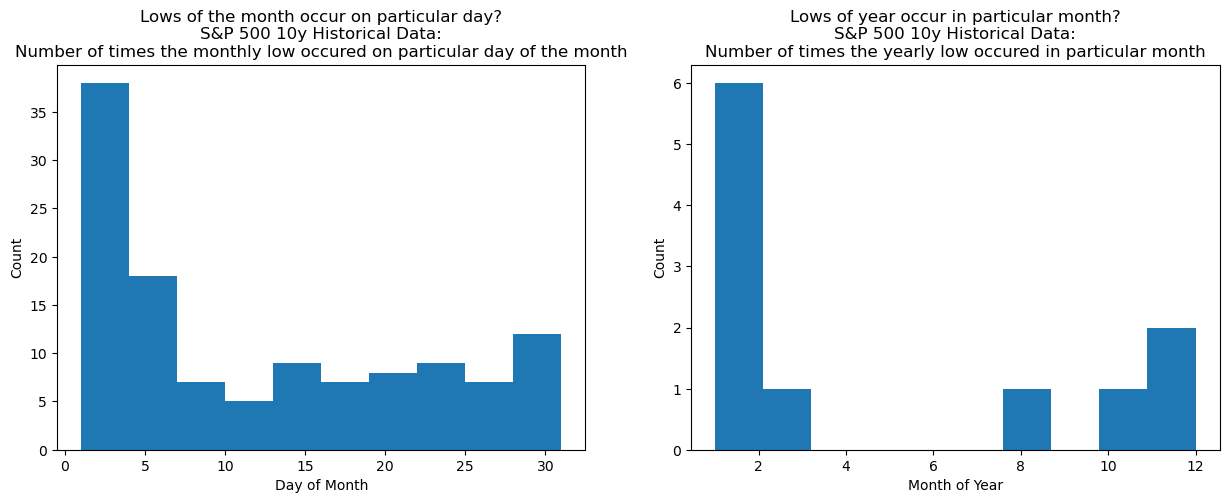

In [17]:
# minimums in price fall on particular days/months?
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].hist(dayofmin)
ax[0].set_xlabel('Day of Month')
ax[0].set_ylabel('Count')
ax[0].set_title('Lows of the month occur on particular day?\nS&P 500 10y Historical Data:\nNumber of times the monthly low occured on particular day of the month')

ax[1].hist(monthofmin)
ax[1].set_xlabel('Month of Year')
ax[1].set_ylabel('Count')
ax[1].set_title('Lows of year occur in particular month?\nS&P 500 10y Historical Data:\nNumber of times the yearly low occured in particular month')

- The market has generally gone up in last 10 years
- Lows are at the beginning of the month or year since the market trends up, with some exceptions

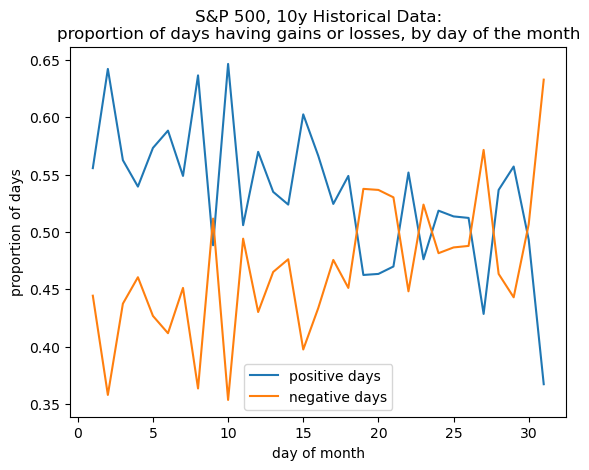

In [18]:
# are gains or losses more common at a particular time during the month?
# calculate proportions of days with gains, losses, no change
pos = (pivoted > 0).mean()
neg = (pivoted < 0).mean()
zer = (pivoted == 0).mean()

# plot proportions of days, not counting days with zero change (likely holidays or weekends)
plt.plot(pos / (1-zer), label='positive days')
plt.plot(neg / (1-zer), label='negative days')

plt.xlabel('day of month')
plt.ylabel('proportion of days')
plt.title('S&P 500, 10y Historical Data:\nproportion of days having gains or losses, by day of the month')
plt.legend()

- some months shorter than others, data affected by this after the 28th day of the month
- slightly higher proportion of positive days in first half of the month

Text(0.5, 1.0, 'S&P 500, 10y Historical Data:\nproportion of days with losses by day in month')

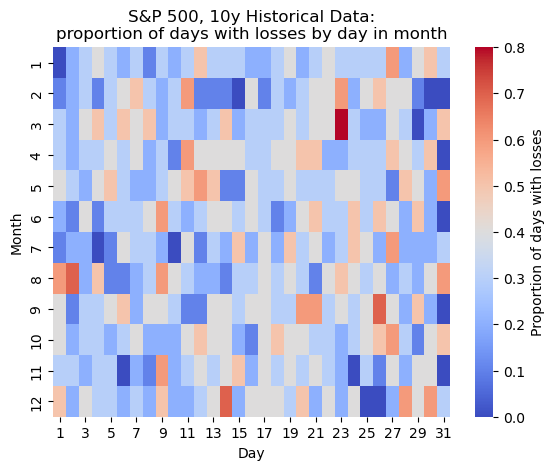

In [19]:
# another view of losses by day in month with additional granularity by month
sns.heatmap((pivoted < 0).groupby('Month').mean(), cbar_kws={'label':'Proportion of days with losses'}, cmap='coolwarm')
plt.title('S&P 500, 10y Historical Data:\nproportion of days with losses by day in month')

- the market is closed on holidays (Jan 1 New Years, July 4th, etc), so the proportion of these days with losses (or gains) will be zero

### Simulation
Hypothetically start with $10,000, check value 5 years after investing start date

Test different investing strategies:
1. invest all the money at once on the start date
2. invest \$1,000 at the beginning of every month
3. invest $2,000 per month when price drops below 30-day moving average

In [20]:
# function to simulate strategies
# inputs:
# df: dataframe of stock data, date indexed
# total_funds: total amount to invest
# invest_amt: amount to invest on each buy day
# start_date: date to start enacting investment strategy
# strategy: strategy number, outline above
# outputs:
# (total_value, span): (value of investments 5 years after start date, timespan required to invest 'total_funds' amount)
def strategy_sim(df, total_funds=10000, invest_amt=1000, start_date=df.index.min(), strategy=1):
    # create empty dataframe
    investdf = pd.DataFrame()
    # keep data from start date onward
    subdf = df.loc[start_date:]
    # define date to check value of investments, 5 years after start date
    check_date = start_date + pd.offsets.DateOffset(years=5)

    # if check_date not available/not trading day, find next closest date
    if check_date not in subdf.index:
        check_date = min(subdf.index, key=lambda x: abs(x - check_date))
    
    # calculate potential buy dates under strategies
    if strategy == 1:
        # invest all at once at start date
        buy_dates = np.min(subdf.index)
        # price on buy date
        buy_price = df.loc[buy_dates, 'Close']
        # price on check date, 5 years after start date
        check_price = df.loc[check_date, 'Close']
        # calculate change in value
        change = (check_price - buy_price) / buy_price
        # calculate total value after 5 years
        total_value = total_funds + (change * total_funds)
        # 1 day to complete investment
        span = 1
        return total_value, span
        
    elif strategy == 2:
        # invest on first trading day of month
        buy_dates = subdf.groupby([subdf.index.year, subdf.index.month]).min()['Date']
    
    elif strategy == 3:
        # invest once per month when open price below 30d MA
        cond = df['Open'] < df['Close30d_MA']
        subdf2 = subdf.loc[cond, :]
        buy_dates = subdf2.groupby([subdf2.index.year, subdf2.index.month]).min()['Date']

    else:
        print('invalid strategy number, must be 1, 2, or 3')

    # calculate investment amounts based on the chosen investment amount and total funds available
    xfull = int(np.floor(total_funds / invest_amt))
    remainder = total_funds % invest_amt

    if remainder > 0:
        buyamts = xfull * [invest_amt] + [remainder]
    else:
        buyamts = xfull * [invest_amt]

    # number of investments to make to invest total_funds amount
    numbuys = len(buyamts)

    # truncate the list of dates to only buy days
    buy_dates = buy_dates[:numbuys]
    # price on buy days
    buy_price = list(df.loc[buy_dates, 'Close'])
    # price at check point
    check_price = df.loc[check_date, 'Close']

    # store in dataframe
    investdf['buy_dates'] = buy_dates
    investdf['amt_invested'] = buyamts
    investdf['buy_price'] = buy_price
    investdf['check_price'] = check_price
    # calculate change in value
    investdf['change'] = (investdf['check_price'] - investdf['buy_price']) / investdf['buy_price']
    # calculate total value after 5 years
    investdf['value'] = investdf['amt_invested'] + (investdf['change'] * investdf['amt_invested'])
    total_value = investdf['value'].sum()
    # calculate time required to invest 'total_funds' amount
    span = (investdf['buy_dates'].max() - investdf['buy_dates'].min()).days
    # print(span)
    # print(investdf)
    # return investdf
    return total_value, span

In [21]:
# choose random start dates, leave enough data to do 5y check
date_choice = np.random.choice(df.loc['2015':'2019'].index, size=500)

# empty arrays to store outputs
values = np.zeros((4, len(date_choice))) # 4 rows, col for each date
timespan = np.zeros((4, len(date_choice)))

# for each start date, simulate returns for each investment strategy
for n, ndate in enumerate(date_choice):
    for num, amt in [(1, 10000), (2, 1000), (3, 2000)]:
        values[num, n], timespan[num, n] = strategy_sim(df, 
                                          total_funds=10000, 
                                          invest_amt=amt, 
                                          start_date=ndate, 
                                          strategy=num)

Text(0, 0.5, 'Count')

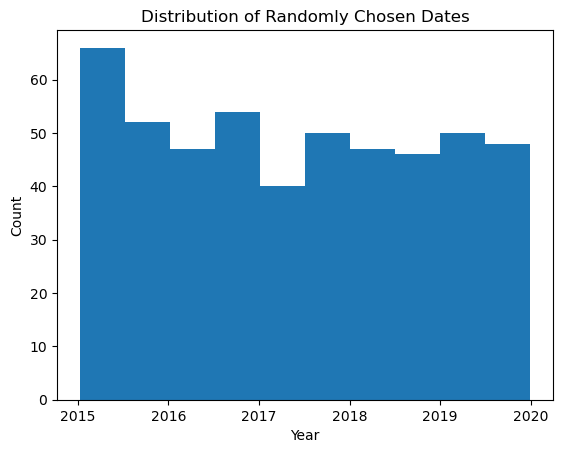

In [22]:
plt.hist(date_choice)
plt.title('Distribution of Randomly Chosen Dates')
plt.xlabel('Year')
plt.ylabel('Count')

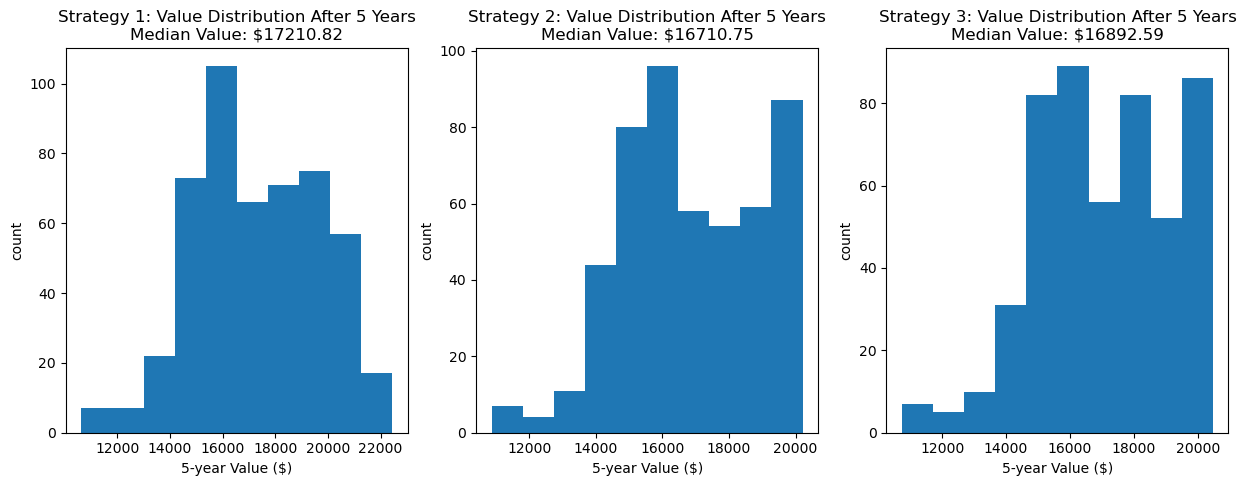

In [23]:
# plot
fig, axs = plt.subplots(1,3, figsize=(15,5))
ax = axs.ravel()
for i in range(3):
    ax[i].hist(values[i+1,:])
    p50 = np.round(np.percentile(values[i+1,:], q=50), 2)
    ax[i].set_title(f'Strategy {i + 1}: Value Distribution After 5 Years\nMedian Value: ${p50}')
    ax[i].set_xlabel('5-year Value ($)')
    ax[i].set_ylabel('count')

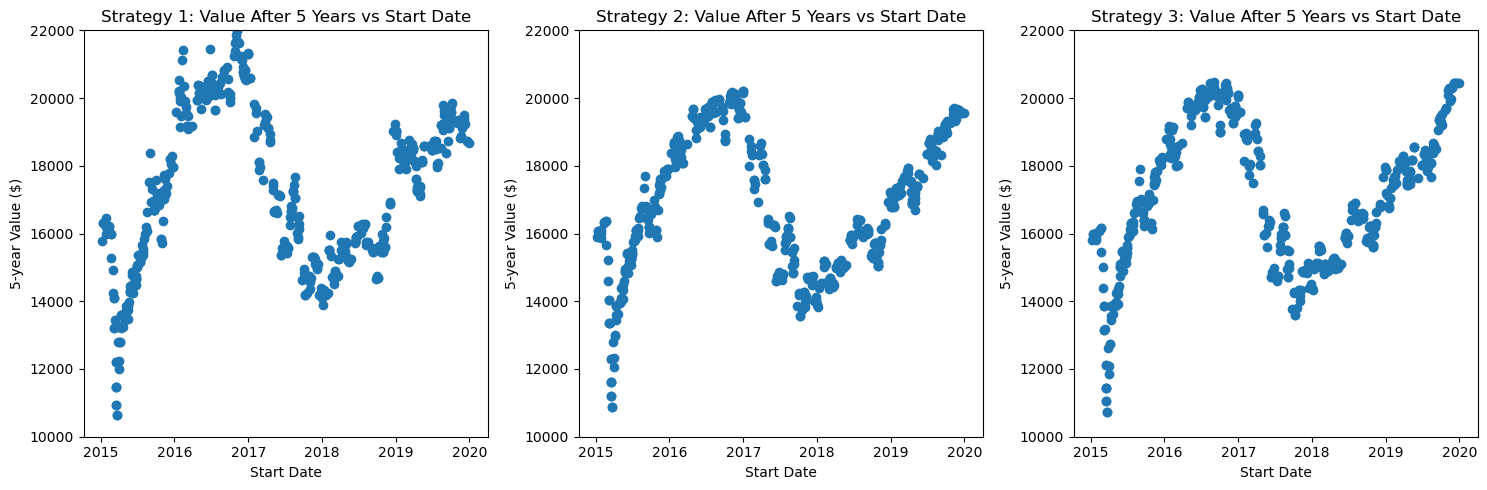

In [24]:
# plot
fig, axs = plt.subplots(1,3, figsize=(15,5))
ax = axs.ravel()
for i in range(3):
    ax[i].plot(date_choice, values[i+1,:], 'o')
    ax[i].set_ylim([10000, 22000])
    ax[i].set_title(f'Strategy {i + 1}: Value After 5 Years vs Start Date')
    ax[i].set_xlabel('Start Date')
    ax[i].set_ylabel('5-year Value ($)')
    
plt.tight_layout()

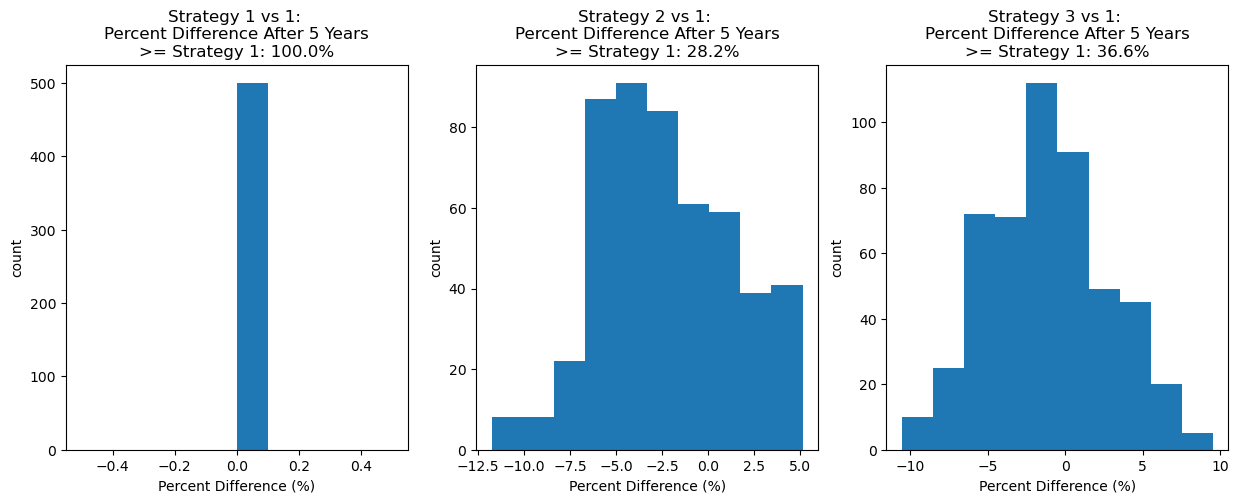

In [25]:
fig, axs = plt.subplots(1,3, figsize=(15,5))
ax = axs.ravel()
for i in range(3):
    pctdiff = 100 * ((values[i+1, :] - values[1, :]) / values[1, :])
    zeroplus = np.round(sum(pctdiff >= 0) / len(pctdiff) * 100, 2)
    ax[i].hist(pctdiff)
    ax[i].set_title(f'Strategy {i + 1} vs 1: \nPercent Difference After 5 Years\n>= Strategy 1: {zeroplus}%')
    ax[i].set_xlabel('Percent Difference (%)')
    ax[i].set_ylabel('count')

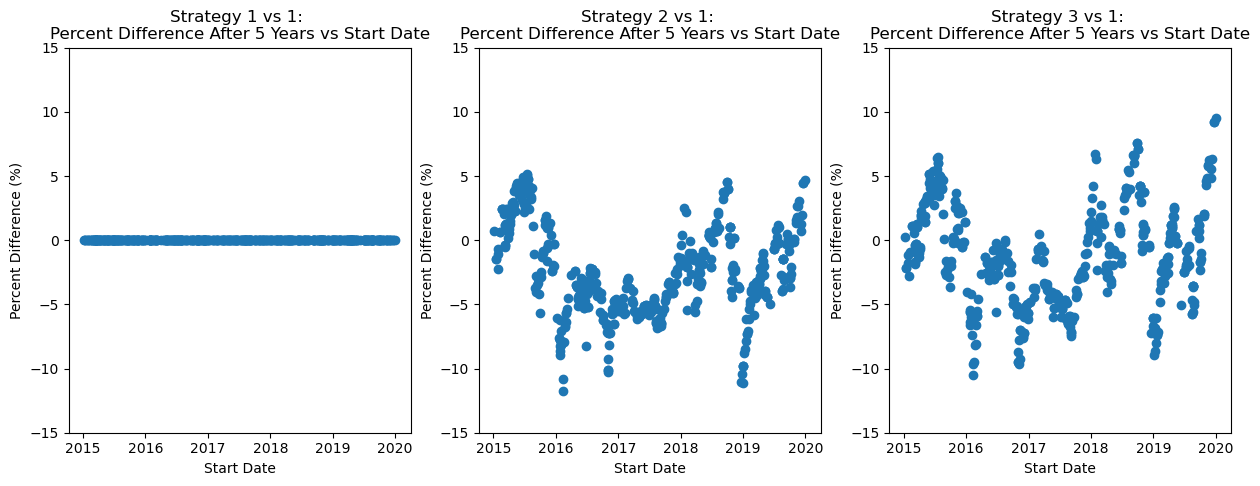

In [26]:
fig, axs = plt.subplots(1,3, figsize=(15,5))
ax = axs.ravel()
for i in range(3):
    pctdiff = 100 * ((values[i+1, :] - values[1, :]) / values[1, :])
    ax[i].plot(date_choice, pctdiff, 'o')
    ax[i].set_ylim([-15, 15])
    ax[i].set_title(f'Strategy {i + 1} vs 1: \nPercent Difference After 5 Years vs Start Date')
    ax[i].set_xlabel('Start Date')
    ax[i].set_ylabel('Percent Difference (%)')

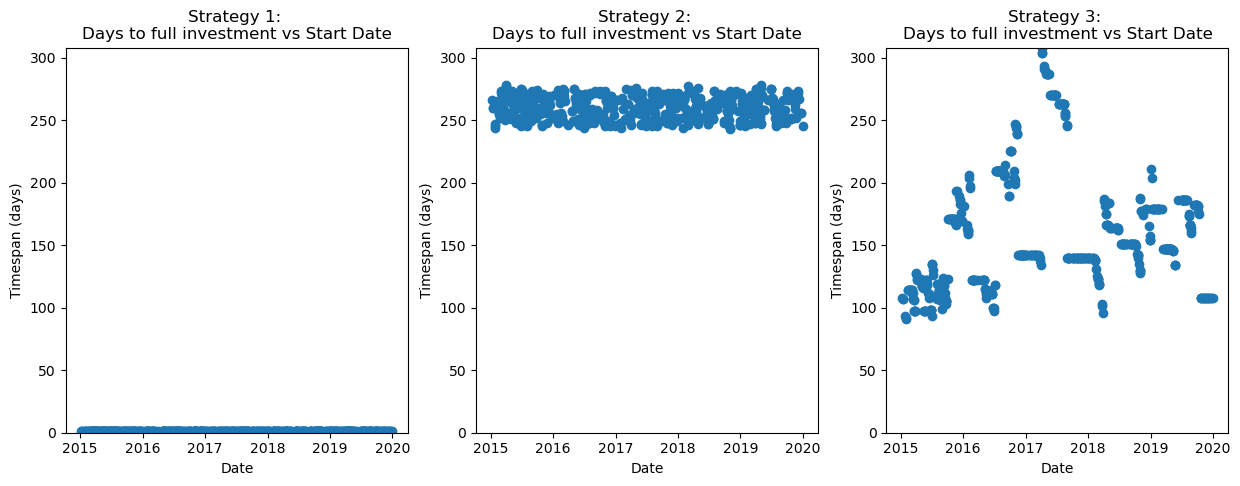

In [27]:
# plot
fig, axs = plt.subplots(1,3, figsize=(15,5))
ax = axs.ravel()
for i in range(3):
    ax[i].plot(date_choice, timespan[i+1, :], 'o')
    ax[i].set_ylim([0, max(timespan.ravel())])
    ax[i].set_title(f'Strategy {i + 1}: \nDays to full investment vs Start Date')
    ax[i].set_xlabel('Date')
    ax[i].set_ylabel('Timespan (days)')

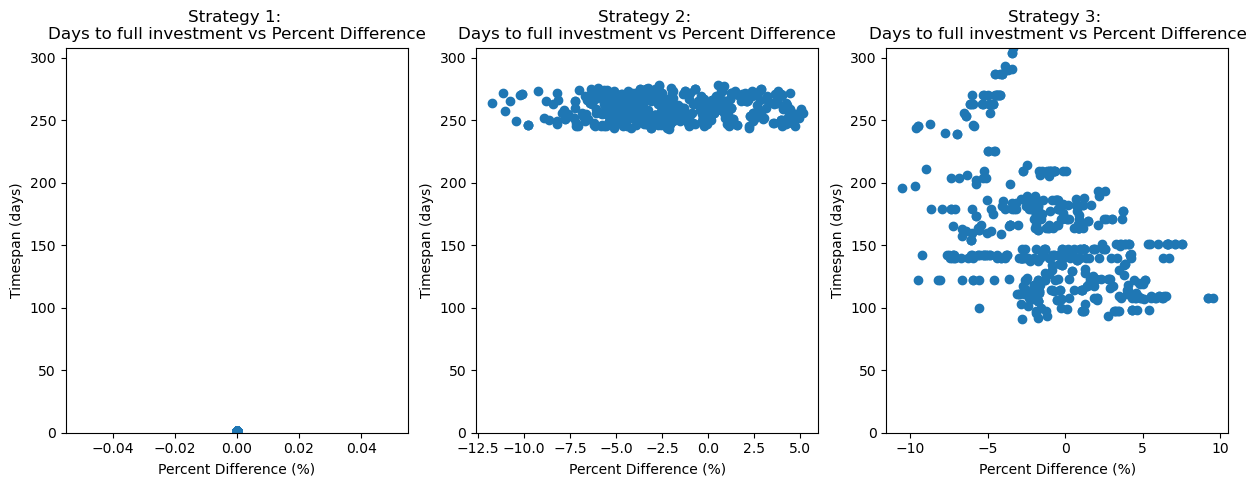

In [28]:
# plot
fig, axs = plt.subplots(1,3, figsize=(15,5))
ax = axs.ravel()
for i in range(3):
    pctdiff = 100 * ((values[i+1, :] - values[1, :]) / values[1, :])
    ax[i].plot(pctdiff, timespan[i+1, :], 'o')
    ax[i].set_ylim([0, max(timespan.ravel())])
    ax[i].set_title(f'Strategy {i + 1}: \nDays to full investment vs Percent Difference')
    ax[i].set_xlabel('Percent Difference (%)')
    ax[i].set_ylabel('Timespan (days)')

- strategies all depended on market environment when investing occurred
- strategy 1 grew \\$2k to $12k in value, a 20-120% increase in value depending on the start date
- since all money was invested at once, strategy 1 was dependent on that single day and had larger variability in final value 
- total value 5 years after start date for strategies 2 and 3 often lower than strategy 1
- lower value may be due to amount of time required to invest, strategies 2 and 3 took longer to fully invest 'total_funds'
- strategy 1 investment spent 3-10 months longer in the market, had longer to grow
- despite longer time required to invest total funds, strategies 2 and 3 outperformed strategy 1 about 1/3 of the time